# Assignment 7

## Code Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [3]:
# Load the dataset
df = pd.read_csv('Spotify_Youtube.csv')

df.head()
# Focus on the following three columns: Liveness, Energy, Loudness

,Artist,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Views,Likes,Comments
0,Gorillaz,0.818,0.705,6,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,693555221.0,6220896.0,169907.0
1,Gorillaz,0.676,0.703,8,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,72011645.0,1079128.0,31003.0
2,Gorillaz,0.695,0.923,1,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,8435055.0,282142.0,7399.0
3,Gorillaz,0.689,0.739,2,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,211754952.0,1788577.0,55229.0
4,Gorillaz,0.663,0.694,10,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,618480958.0,6197318.0,155930.0


In [4]:
# Preprocess
# Check for columns with null/na values
np.where(pd.isna(df))

(array([ 218,  410,  410,  410,  411,  411,  411,  412,  412,  412,  413,
         413,  413,  414,  414,  414,  415,  415,  415,  416,  416,  416,
         417,  417,  417,  418,  418,  418,  507,  593,  593,  593,  620,
         620,  620,  622,  622,  622,  623,  623,  623,  624,  624,  624,
         625,  625,  625,  626,  626,  626,  627,  627,  627,  905,  905,
         905,  925,  925,  925,  938,  938,  938,  962,  962,  962,  968,
         968,  968,  970,  971,  971,  971,  972,  972,  972,  973,  973,
         973,  974,  974,  974,  976,  976,  976,  988,  988,  988,  989,
         989,  989,  990,  990,  990,  991,  991,  991,  992,  992,  992,
         994,  994,  994,  995,  995,  995,  997,  997,  997, 1327, 1327,
        1327, 1334, 1334, 1334, 1417, 1417, 1417, 1470, 1470, 1470, 1481,
        1481, 1481, 1494, 1494, 1494, 1495, 1495, 1495, 1557, 1557, 1590,
        1703, 1722, 1722, 1722, 1723, 1723, 1723, 1770, 1906, 1924, 1924,
        1924, 1945, 1958, 1959, 1959, 

In [5]:
# Check for missing values
df.isnull().sum()

,0
Artist,0
Danceability,0
Energy,0
Key,0
Loudness,0
Speechiness,0
Acousticness,0
Instrumentalness,0
Liveness,0
Valence,0


In [6]:
# Check for duplicate rows
df.duplicated().sum()

np.int64(0)

In [7]:
X = df[['Liveness', 'Energy', 'Loudness']].copy()

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Elbow Method

Text(0, 0.5, 'Inertia')

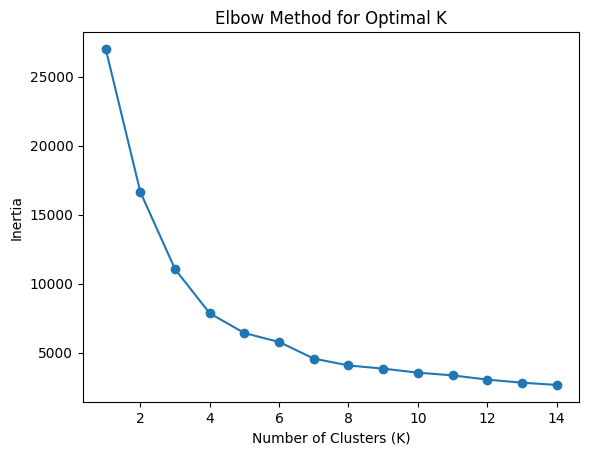

In [8]:
# Elbow method to find the optimal number of K
inertias = []
K_range = range(1, 15)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(K_range, inertias, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')

### 3D Visualization

In [9]:
# Visualize in 3D
optimal_K = 5       # Determined based the Elbow diagram above

km = KMeans(n_clusters=optimal_K, n_init = 10, max_iter = 300, random_state=0)
y_km = km.fit_predict(X_scaled)

In [10]:
scaled_centers = km.cluster_centers_       #a list of cluster centers

df2 = scaled_centers.copy()
df2 = pd.DataFrame(df2,columns=['Liveness', 'Energy', 'Loudness'])
df2

,Liveness,Energy,Loudness
0,-0.311228,-0.808288,-0.416131
1,-0.492613,0.607334,0.511872
2,-0.391344,-2.216251,-2.936451
3,3.124490,0.313916,0.180831
4,0.778762,0.685493,0.510497


In [11]:
centers_original = scaler.inverse_transform(scaled_centers)
df3 = pd.DataFrame(centers_original,columns=['Liveness', 'Energy', 'Loudness'])
df3

,Liveness,Energy,Loudness
0,0.142656,0.426166,-11.000930
1,0.110803,0.761112,-5.986374
2,0.128587,0.093033,-24.619728
3,0.746002,0.691687,-7.775189
4,0.334069,0.779605,-5.993806


Cluster Interpretation based on their characteristics:

- Cluster 0: low liveness, moderate energy, moderate loudness (label: Moderate Studio Recording)

- Cluster 1: low liveness, high energy, high loudness (label: High-Energy Studio Banger)

- Cluster 2: low liveness, low energy, low loudness (label: Quiet Ambient)

- Cluster 3: high liveness, moderate-to-high energy, high loudness (label: Live High-Energy Performance)

- Cluster 4: moderate liveness, high energy, high loudness (label: Hybrid Live-Studio Track)

In [12]:
cluster_labels = {
    0: "Moderate Studio Recording",
    1: "High-Energy Studio Banger",
    2: "Quiet Ambient",
    3: "Live High-Energy Performance",
    4: "Hybrid Live-Studio Track",
}

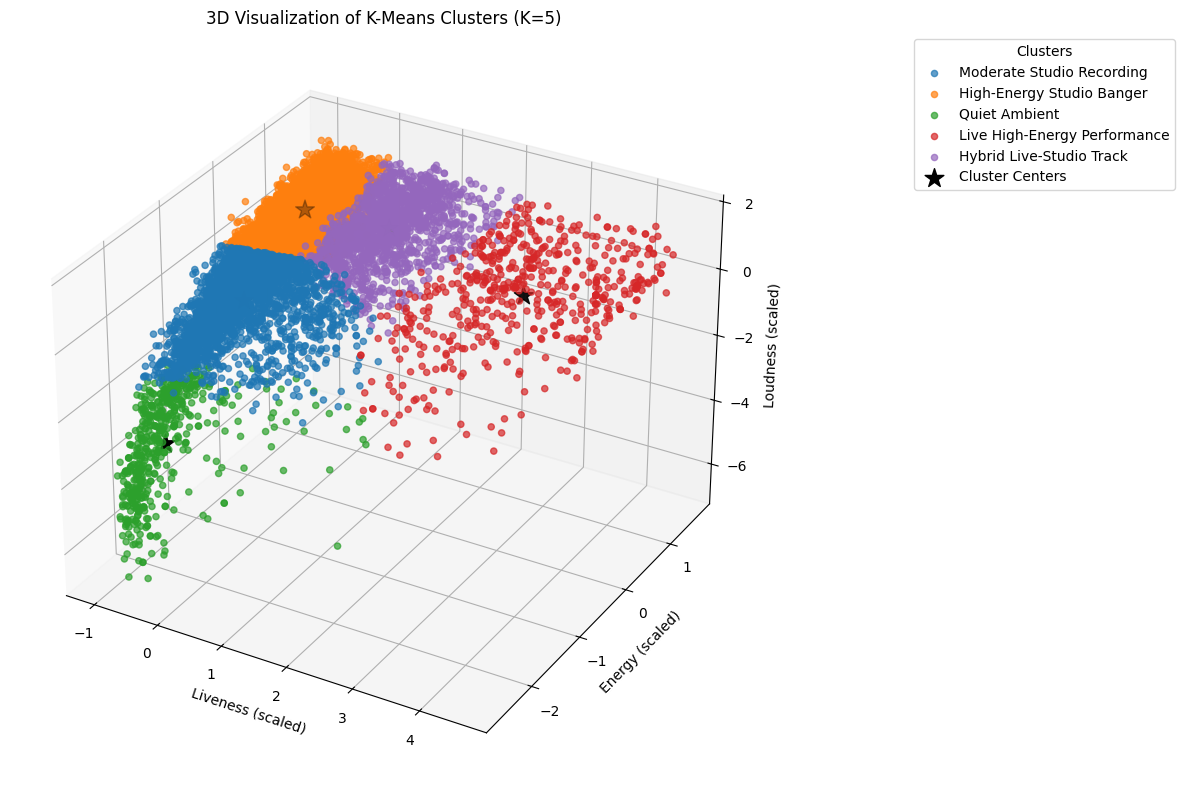

In [13]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a list to store scatter plots for legend
scatters = []

# Plot each cluster with consistent colors
for i in range(optimal_K):
    scat = ax.scatter(X_scaled[y_km==i, 0],
                      X_scaled[y_km==i, 1],
                      X_scaled[y_km==i, 2],
                      label=cluster_labels[i],
                      alpha=0.7)
    scatters.append(scat)

# Plot cluster centers
ax.scatter(km.cluster_centers_[:,0],
           km.cluster_centers_[:,1],
           km.cluster_centers_[:,2],
           s=200, marker='*', c='black', label='Cluster Centers')

ax.set_title(f'3D Visualization of K-Means Clusters (K={optimal_K})')
ax.set_xlabel("Liveness (scaled)")
ax.set_ylabel("Energy (scaled)")
ax.set_zlabel("Loudness (scaled)")
ax.legend(bbox_to_anchor=(1.2, 1), loc='upper left', title="Clusters")

plt.tight_layout()
plt.show()

### Hierarchical Clustering

In [14]:
# Hierarchical Clustering
columns_to_cluster = ['Liveness', 'Energy', 'Loudness']

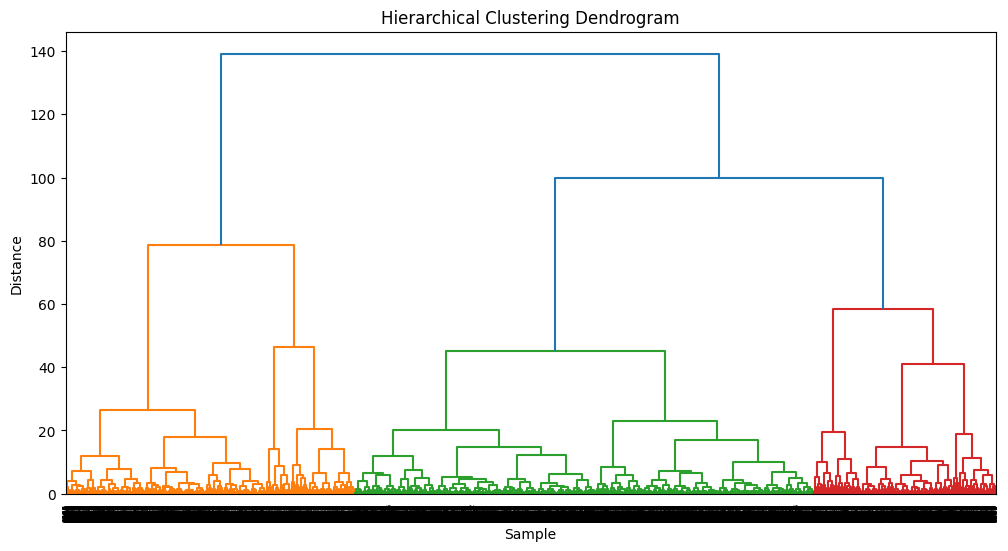

In [15]:
# Hierarchical Clustering for all - Dendrogram
all = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(all)
plt.title(f'Hierarchical Clustering Dendrogram')
plt.xlabel('Sample')
plt.ylabel('Distance')
plt.show()

#### Dendrogram

In [16]:
X_scaled

array([[ 2.36711832,  0.37018068,  0.38369377],
       [-0.85992322,  0.36172784,  0.54358724],
       [-0.46302045,  1.29154038,  0.89242889],
       ...,
       [ 0.42531284,  0.4547091 ,  0.47622471],
       [-0.50288156,  0.85621906,  0.70792219],
       [ 0.04378508,  0.77591707,  0.07149437]])

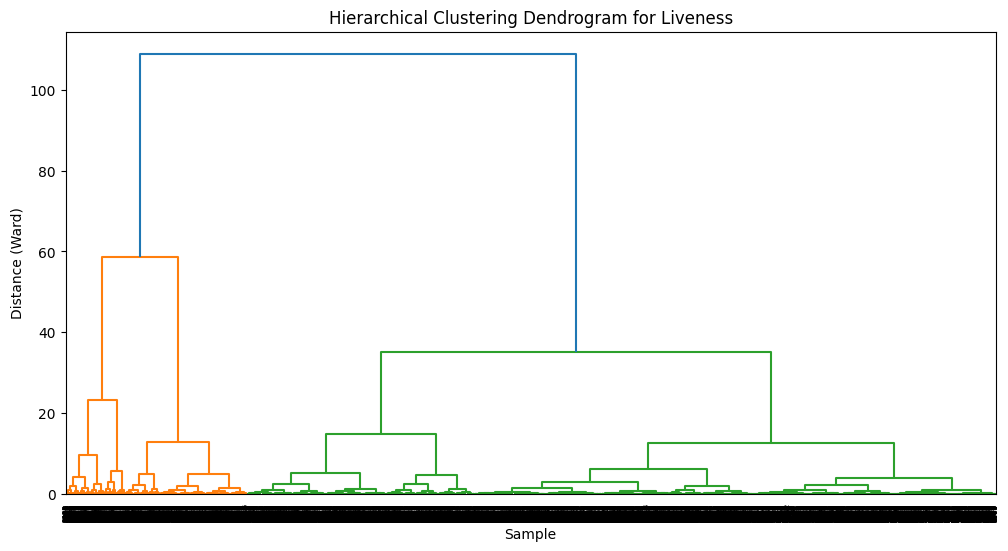

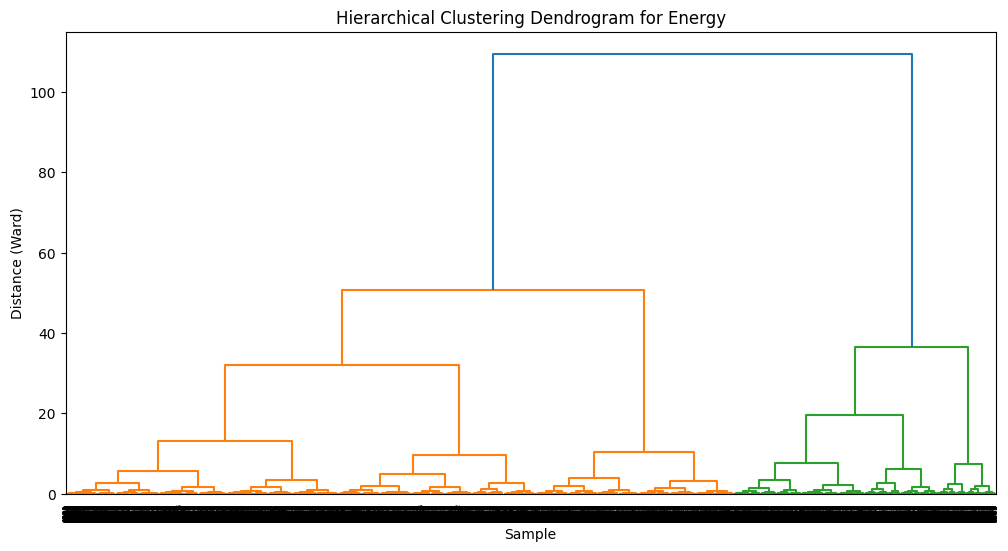

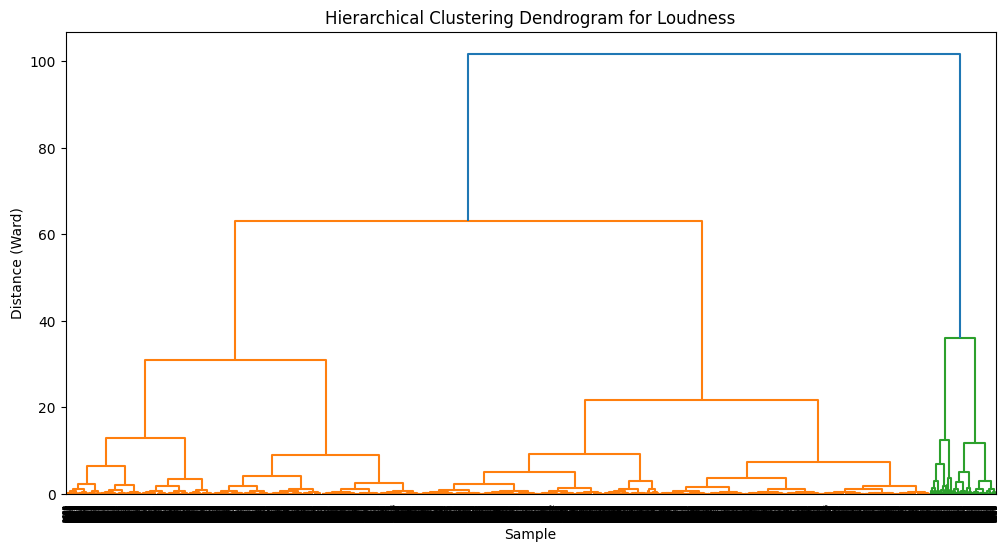

In [17]:
# Get column indices (since X_scaled is a numpy array)
column_indices = [X.columns.get_loc(col) for col in columns_to_cluster]

for i, column in enumerate(columns_to_cluster):
    # Extract the column data and reshape it for clustering (-1,1 makes it 2D)
    X_col = X_scaled[:, column_indices[i]].reshape(-1, 1)  # Reshape to (n_samples, 1)

    # Perform hierarchical clustering
    linked = linkage(X_col, method='ward')

    # Plot dendrogram
    plt.figure(figsize=(12, 6))
    dendrogram(linked,
               orientation='top',
               distance_sort='descending',
               show_leaf_counts=True)
    plt.title(f'Hierarchical Clustering Dendrogram for {column}')
    plt.xlabel('Sample')
    plt.ylabel('Distance (Ward)')
    plt.show()

#### Clustering Result (based on n = 3 from Dendrogram)

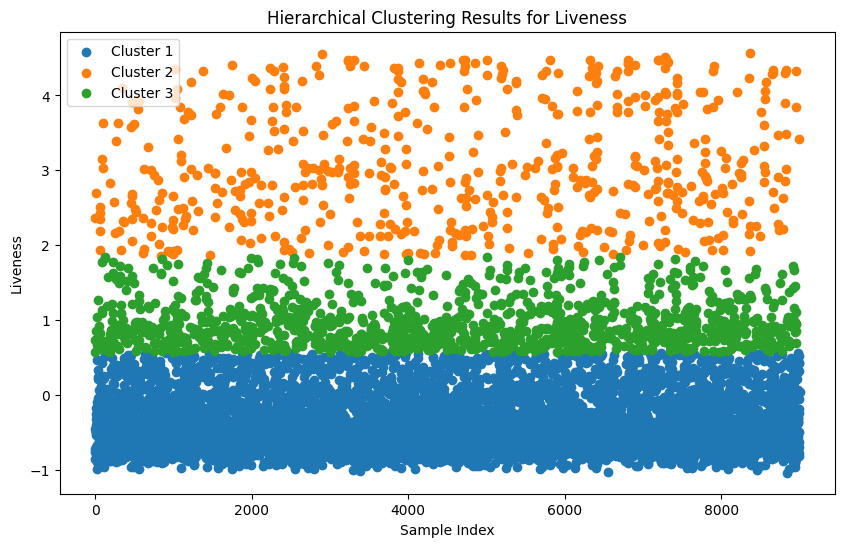


Cluster statistics for Liveness:
Cluster 1:
  Size: 7247
  Min: -1.041
  Max: 0.568
  Mean: -0.399
  Std: 0.348

Cluster 2:
  Size: 571
  Min: 1.855
  Max: 4.571
  Mean: 3.074
  Std: 0.790

Cluster 3:
  Size: 1181
  Min: 0.573
  Max: 1.843
  Mean: 0.964
  Std: 0.312



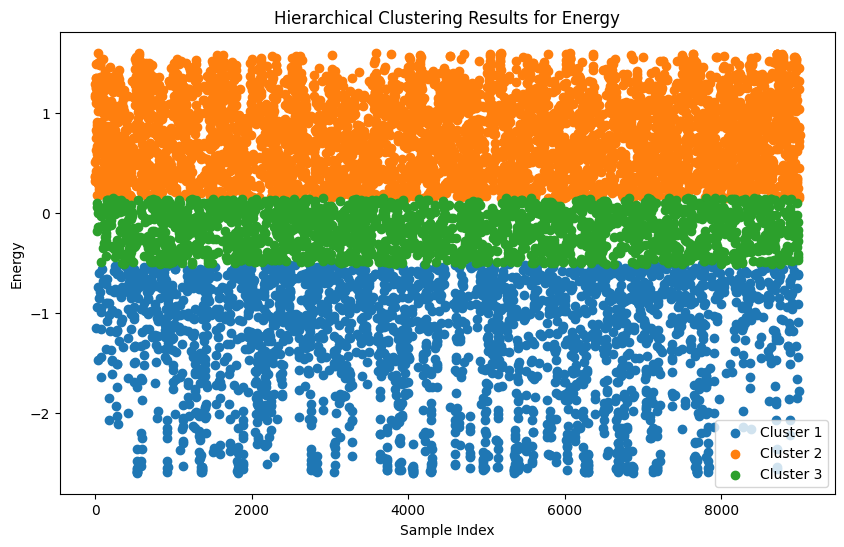


Cluster statistics for Energy:
Cluster 1:
  Size: 2532
  Min: -2.601
  Max: -0.513
  Mean: -1.304
  Std: 0.616

Cluster 2:
  Size: 4536
  Min: 0.150
  Max: 1.604
  Mean: 0.801
  Std: 0.392

Cluster 3:
  Size: 1931
  Min: -0.509
  Max: 0.146
  Mean: -0.171
  Std: 0.192



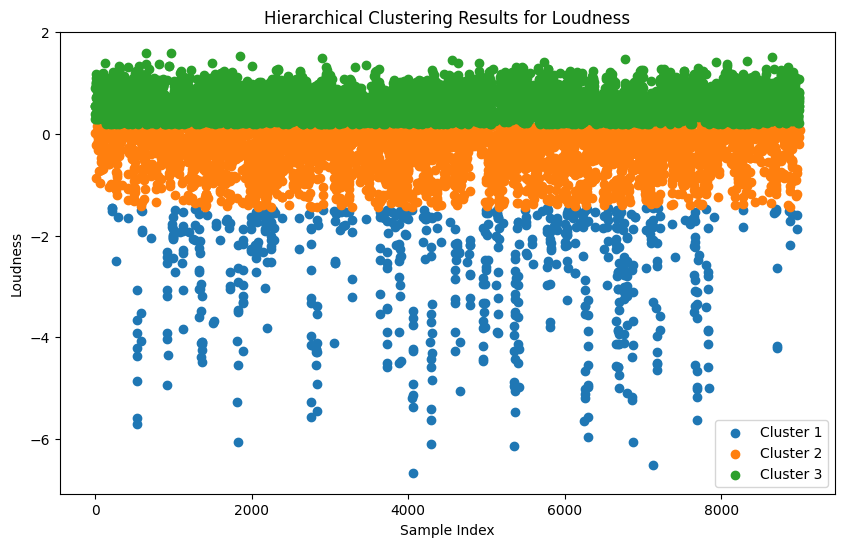


Cluster statistics for Loudness:
Cluster 1:
  Size: 632
  Min: -6.664
  Max: -1.452
  Mean: -2.757
  Std: 1.165

Cluster 2:
  Size: 3419
  Min: -1.444
  Max: 0.185
  Mean: -0.378
  Std: 0.435

Cluster 3:
  Size: 4948
  Min: 0.186
  Max: 1.594
  Mean: 0.613
  Std: 0.262



In [18]:
for i, column in enumerate(columns_to_cluster):
    # Extract the column data and reshape it for clustering (-1,1 makes it 2D)
    X_col = X_scaled[:, column_indices[i]].reshape(-1, 1)  # Reshape to (n_samples, 1)

    # Determine number of clusters based on the individual dendrogram above, the reasonable choice is 3 clusters
    n_clusters = 3

    # Perform Agglomerative Clustering (updated parameter)
    cluster = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
    cluster_labels = cluster.fit_predict(X_col)

    # Plot the clusters
    plt.figure(figsize=(10, 6))
    for i in range(n_clusters):
        plt.scatter(np.arange(len(X_col))[cluster_labels == i],
                   X_col[cluster_labels == i],
                   label=f'Cluster {i+1}')

    plt.title(f'Hierarchical Clustering Results for {column}')
    plt.xlabel('Sample Index')
    plt.ylabel(column)
    plt.legend()
    plt.show()

    # Print cluster statistics
    print(f"\nCluster statistics for {column}:")
    for i in range(n_clusters):
        cluster_data = X_col[cluster_labels == i]
        print(f"Cluster {i+1}:")
        print(f"  Size: {len(cluster_data)}")
        print(f"  Min: {cluster_data.min():.3f}")
        print(f"  Max: {cluster_data.max():.3f}")
        print(f"  Mean: {cluster_data.mean():.3f}")
        print(f"  Std: {cluster_data.std():.3f}")
        print()

#### Clustering Result (based on n = 5 consistent with K-MEANS)

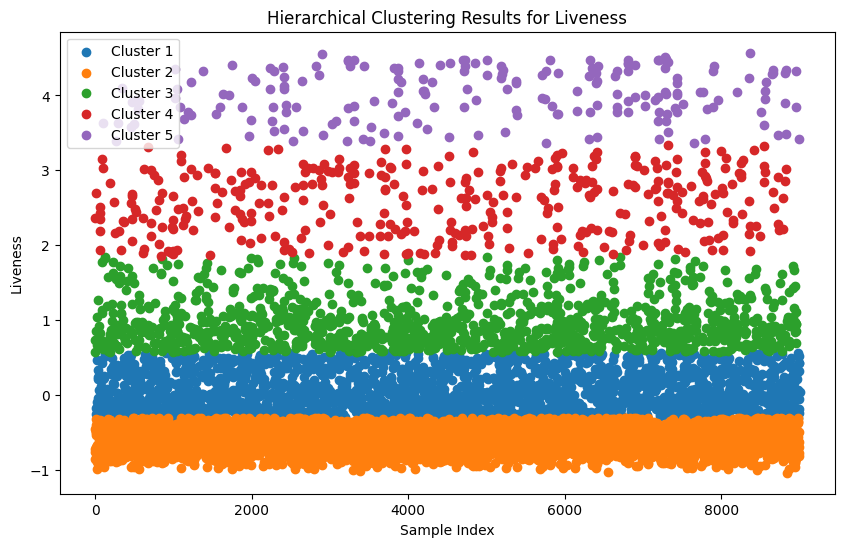


Cluster statistics for Liveness:
Cluster 1:
  Size: 2177
  Min: -0.304
  Max: 0.568
  Mean: 0.047
  Std: 0.255

Cluster 2:
  Size: 5070
  Min: -1.041
  Max: -0.309
  Mean: -0.591
  Std: 0.152

Cluster 3:
  Size: 1181
  Min: 0.573
  Max: 1.843
  Mean: 0.964
  Std: 0.312

Cluster 4:
  Size: 369
  Min: 1.855
  Max: 3.335
  Mean: 2.564
  Std: 0.411

Cluster 5:
  Size: 202
  Min: 3.364
  Max: 4.571
  Mean: 4.006
  Std: 0.335



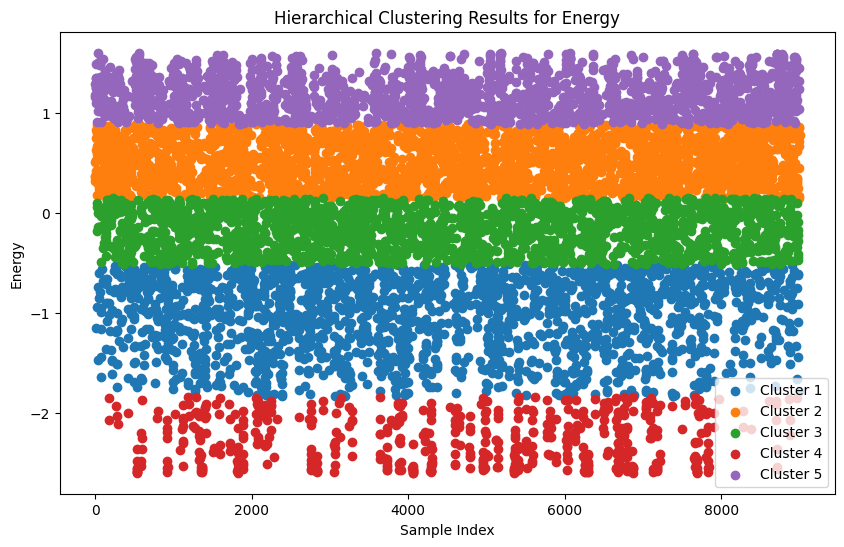


Cluster statistics for Energy:
Cluster 1:
  Size: 1969
  Min: -1.836
  Max: -0.513
  Mean: -1.029
  Std: 0.362

Cluster 2:
  Size: 2626
  Min: 0.150
  Max: 0.890
  Mean: 0.515
  Std: 0.212

Cluster 3:
  Size: 1931
  Min: -0.509
  Max: 0.146
  Mean: -0.171
  Std: 0.192

Cluster 4:
  Size: 563
  Min: -2.601
  Max: -1.840
  Mean: -2.266
  Std: 0.244

Cluster 5:
  Size: 1910
  Min: 0.894
  Max: 1.604
  Mean: 1.194
  Std: 0.188



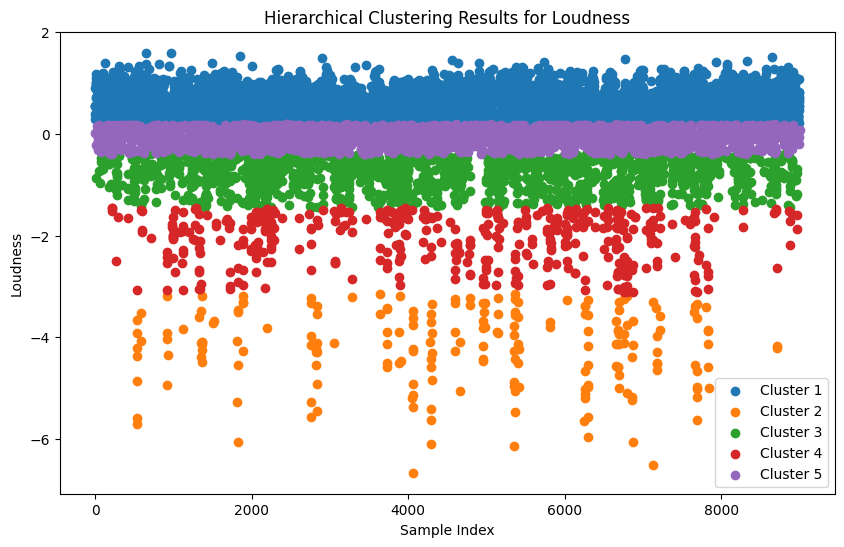


Cluster statistics for Loudness:
Cluster 1:
  Size: 4948
  Min: 0.186
  Max: 1.594
  Mean: 0.613
  Std: 0.262

Cluster 2:
  Size: 206
  Min: -6.664
  Max: -3.149
  Mean: -4.211
  Std: 0.756

Cluster 3:
  Size: 1412
  Min: -1.444
  Max: -0.398
  Mean: -0.822
  Std: 0.289

Cluster 4:
  Size: 426
  Min: -3.120
  Max: -1.452
  Mean: -2.055
  Std: 0.471

Cluster 5:
  Size: 2007
  Min: -0.395
  Max: 0.185
  Mean: -0.065
  Std: 0.167



In [19]:
# In this case, the number of clusters is set to '5' for consistency with K-MEANS
for i, column in enumerate(columns_to_cluster):
    # Extract the column data and reshape it for clustering (-1,1 makes it 2D)
    X_col = X_scaled[:, column_indices[i]].reshape(-1, 1)  # Reshape to (n_samples, 1)

    # Determine number of clusters based on the individual dendrogram above, the reasonable choice is 3 clusters
    n_clusters = 5

    # Perform Agglomerative Clustering (updated parameter)
    cluster = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
    cluster_labels = cluster.fit_predict(X_col)

    # Plot the clusters
    plt.figure(figsize=(10, 6))
    for i in range(n_clusters):
        plt.scatter(np.arange(len(X_col))[cluster_labels == i],
                   X_col[cluster_labels == i],
                   label=f'Cluster {i+1}')

    plt.title(f'Hierarchical Clustering Results for {column}')
    plt.xlabel('Sample Index')
    plt.ylabel(column)
    plt.legend()
    plt.show()

    # Print cluster statistics
    print(f"\nCluster statistics for {column}:")
    for i in range(n_clusters):
        cluster_data = X_col[cluster_labels == i]
        print(f"Cluster {i+1}:")
        print(f"  Size: {len(cluster_data)}")
        print(f"  Min: {cluster_data.min():.3f}")
        print(f"  Max: {cluster_data.max():.3f}")
        print(f"  Mean: {cluster_data.mean():.3f}")
        print(f"  Std: {cluster_data.std():.3f}")
        print()

## Report on Hierarchical clustering